# Import libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score



#  Load data


In [2]:
df = pd.read_csv("Housing.csv")



# Encode categorical columns


In [3]:
label_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating',
              'airconditioning', 'prefarea', 'furnishingstatus']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])



#  Split data


In [4]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#  Train model


In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

#  Predict
y_pred = model.predict(X_test)



# Evaluation


In [6]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



Mean Squared Error: 1771751116594.0344
R² Score: 0.6494754192267804


#  Plot Actual vs Predicted


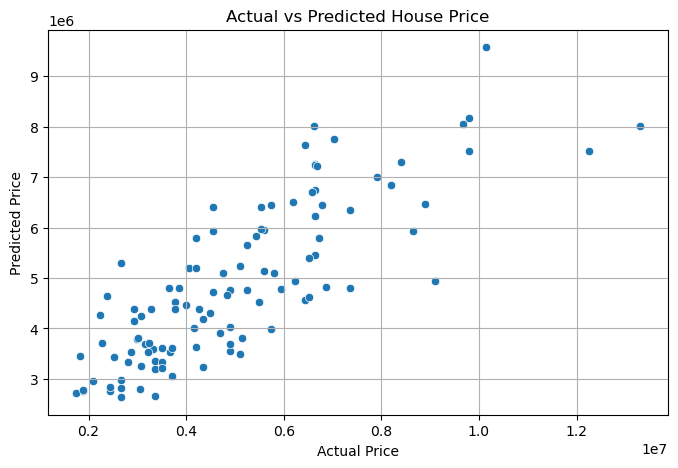

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Price")
plt.grid(True)
plt.show()



# Correlation Heatmap


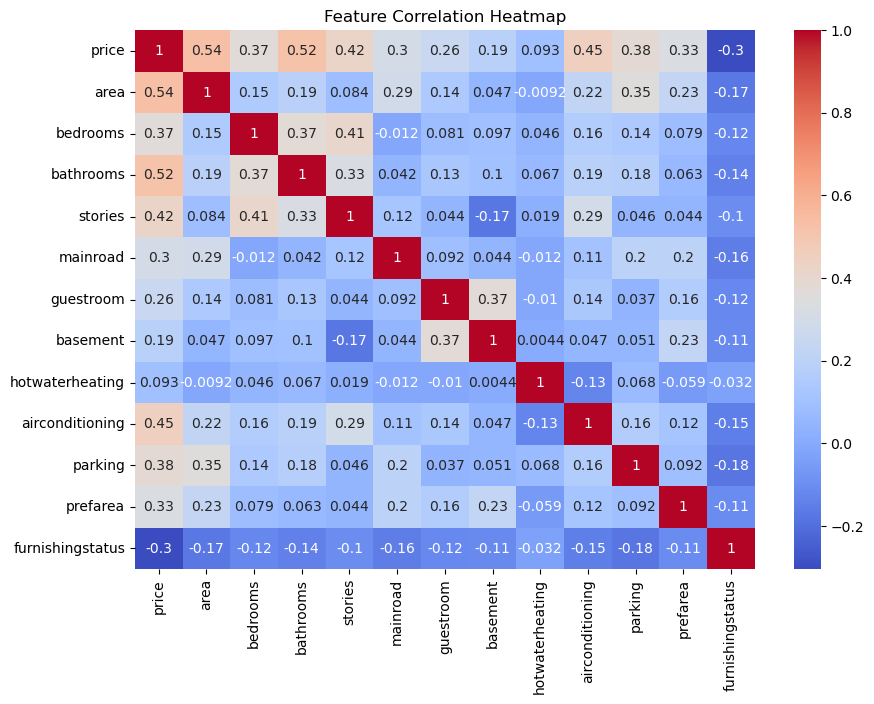

In [8]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()
